# OSMnx - street network analysis
## Cities in Ukraine (Odesa, Lviv, Kyiv and Donetsk)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox
from IPython.display import Image

%matplotlib inline
ox.config(log_console=False)
weight_by_length = False
ox.__version__



'1.1.1'

In [2]:
# define the study sites as label : query
places = {
    "Kyiv": "Kyiv, Ukraine",
    "Lviv": "Lviv, Ukraine",
    "Odesa": "Odesa, Ukraine",
    "Donetsk": "Donetsk, Ukraine"
}

In [3]:
# verify OSMnx geocodes each query to what you expect (i.e., a [multi]polygon geometry)
gdf = ox.geocode_to_gdf(list(places.values()))
gdf


,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((30.23615 50.42681, 30.23736 50.42629...",50.590814,50.213242,30.826359,30.236145,281398207,relation,421866,50.402015,30.614815,"Kyiv, Ukraine",boundary,administrative,0.945857
1,"POLYGON ((23.90510 49.88343, 23.90848 49.88270...",49.903712,49.768175,24.133414,23.905103,281547597,relation,2032280,49.841952,24.031592,"Lviv, Lviv Urban Hromada, Lviv Raion, Lviv Obl...",boundary,administrative,0.893254
2,"MULTIPOLYGON (((30.61140 46.50283, 30.61213 46...",46.629119,46.342707,30.831375,30.611401,281498984,relation,1413934,46.485888,30.683651,"Odesa, Одеський район, Odesa Oblast, Ukraine",place,city,0.876234
3,"POLYGON ((37.52543 47.94155, 37.52564 47.94148...",48.089501,47.875716,37.998791,37.525435,281499009,relation,1413957,48.015875,37.801341,"Donetsk, Voroshylovskyi Raion, Donetsk Municip...",boundary,administrative,0.835128


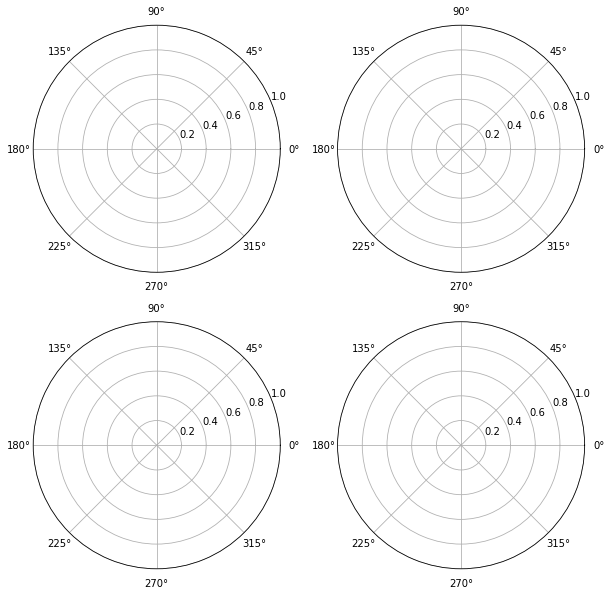

In [4]:
# create figure and axes
n = len(places)
ncols = int(np.ceil(np.sqrt(n)))
nrows = int(np.ceil(n / ncols))
figsize = (ncols * 5, nrows * 5)
fig, axes = plt.subplots(nrows, ncols, figsize=figsize, subplot_kw={"projection": "polar"})

In [5]:

# plot each city's polar histogram
for ax, place in zip(axes.flat, sorted(places.keys())):
    print(ox.utils.ts(), place)

    # get undirected graphs with edge bearing attributes
    G = ox.graph_from_place(place, network_type="drive")
    Gu = ox.add_edge_bearings(ox.get_undirected(G))
    fig, ax = ox.bearing.plot_orientation(Gu, ax=ax, title=place, area=True)

2021-11-04 20:29:54 Donetsk
2021-11-04 20:30:05 Kyiv
2021-11-04 20:30:23 Lviv
2021-11-04 20:30:31 Odesa


In [11]:
# add figure title and save image
suptitle_font = {
    "family": "DejaVu Sans",
    "fontsize": 60,
    "fontweight": "normal",
    "y": 1,
}

fig.suptitle("City Street Network Orientation", **suptitle_font)
fig.tight_layout()
fig.subplots_adjust(hspace=0.35)
fig.savefig("images/street-orientations.png", facecolor="w", dpi=100, bbox_inches="tight")

##### OSMnx - 1 square mile analysis

In [12]:
# configure the inline image display
img_folder = "images"
extension = "png"
size = 240


# specify that we're retrieving building footprint geometries
tags = {"building": True}

In [13]:
# get the location of the Kyiv National university
point_dict = {"Kyiv" : (50.4420116,30.5089232),
              "Lviv" : (49.8413276,24.0294036),
              "Odesa" : (46.4854787,30.7411794),
              "Donetsk" : (48.0034718,37.7987706)
            }
dist = 612

##### OSMnx - generating building footprints for 1sqm of selected location

In [14]:
for point, place in zip(point_dict.values(), sorted(places.keys())):
    gdf = ox.geometries_from_point(point, tags, dist=dist)
    gdf_proj = ox.project_gdf(gdf)
    bbox = ox.utils_geo.bbox_from_point(point=point, dist=dist, project_utm=True)
    fp = f"{img_folder}/{place}1km_bldgs.{extension}"
    fig, ax = ox.plot_footprints(
        gdf_proj,
        bbox=bbox,
        color="w",
        filepath=fp,
        dpi=90,
        save=True,
        show=False,
        close=True,
    )
    Image(fp, height=size, width=size)


##### OSMnx - generating street network for 1sqm of selected location

In [15]:
for point, place in zip(point_dict.values(), sorted(places.keys())):
    G = ox.graph_from_point(point, dist=dist, simplify=False)
    G_projected = ox.project_graph(G)
    bbox = ox.utils_geo.bbox_from_point(point=point, dist=dist, project_utm=True)
    fp = f"{img_folder}/{place}1km_streets.{extension}"
    fig, ax = ox.plot_graph(
        G_projected,
        bbox=bbox,
        filepath=fp,
        dpi=90,
        save=True,
        show=False,
        close=True,
    )
    Image(fp, height=size, width=size)